# Projet Python for data analysis : Enoncé
1. Un powerpoint expliquant les tenants et aboutissant du problème, vos réflexions sur la
question posée, les différentes variables que vous avez créées, comment se situe le
problème dans le contexte de l’étude, etc : 25 %
2. Un code en python :
a. Data-visualisation (utilisez matplotlib, searborn, bokeh…) – montrez le lien
entre les variables et la cible : 25%
b. Modélisation – prenez scikit-learnn essayez plusieurs algorithmes, changez les
hyper paramètres, faites une grille de recherche, comparez les résultats de vos
modèles dans des graphiques : 25%
3. Transformation du modèle en API Django : 25%

# Objectif des chercheurs avec le dataset donné

Le dataset que nous avons : https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset a été utilisé dans le cadre de recherches. Ces chercheurs ont écrit un artcile ***'Video transcoding time prediction for proactive load balancing'*** .L'objectif de cet article est présenté dans son abstract :

"In this paper, we present a method for predicting the transcoding
time of videos given an input video stream and its transcoding parameters. Video transcoding time is treated as a random variable
and is statistically predicted from past observations. Our proposed method predicts the transcoding time as a function of several parameters of the input and output video streams, and does
not require any detailed information about the codec used. We
show the effectiveness of our method via comparing the resulting predictions with the actual transcoding times on unseen video
streams. Simulation results show that our prediction method enables a significantly better load balancing of transcoding jobs
than classical load balancing methods."


TRADUCTION : 

"Dans cet article, nous présentons une méthode permettant de prédire le temps de transcodage des vidéos en fonction d'un flux vidéo d'entrée et de ses paramètres de transcodage. Le temps de transcodage des vidéos est traité comme une variable aléatoire et est statistiquement prédit à partir d'observations passées. La méthode que nous proposons prédit le temps de transcodage en fonction de plusieurs paramètres des flux vidéo d'entrée et de sortie, et ne nécessite aucune information détaillée sur le codec utilisé. Nous démontrons l'efficacité de notre méthode en comparant les prédictions résultantes avec les temps de transcodage réels sur des flux vidéo non vus. Les résultats de la simulation montrent que notre méthode de prédiction permet un équilibrage de charge des travaux de transcodage nettement meilleur que les méthodes classiques d'équilibrage de charge."

# I) Lecture des données

In [3]:
!pip install searchgrid

  Created wheel for searchgrid: filename=searchgrid-0.2.0-py3-none-any.whl size=5771 sha256=0fdf04a3e89bfe46ff4c8507e34b8e49e6a01a495f6a1513b1a059c7edaee2eb
  Stored in directory: c:\users\louis\appdata\local\pip\cache\wheels\f4\e4\c9\7822cbd5f3931a2e6fb176012161def9f87eceef1bb2d82089
Successfully built searchgrid


In [4]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=53fe4e57343c5e76ad1d54df4d9421ad552a2d36207f3e32bc7d88f1a762e656
  Stored in directory: c:\users\louis\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [5]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=e4e3238bd6d51ed208caf6df4d66e1a17497c803926cc1e8786fd13960e93e1d
  Stored in directory: c:\users\louis\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [69]:
!pip install xgboost

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import scipy.stats as stats
import pylab

%matplotlib inline
import os
import sys
import numpy as np
from datetime import datetime
from collections import defaultdict
import itertools
import matplotlib.pyplot as pyplot

In [2]:
dfYoutubeVideo=pd.read_csv('youtube_videos.tsv',sep='\t')
dfTranscodingMes=pd.read_csv('transcoding_mesurment.tsv',sep='\t')

In [8]:
dfYoutubeVideo.head()

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [9]:
dfTranscodingMes.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


# II ) Data Visualisation

## II.1) Description 

In [10]:
dfYoutubeVideo.tail()
nb_lignes, nb_col = dfYoutubeVideo.shape
print(nb_lignes)
print(nb_col)
dfYoutubeVideo.describe()

168286
11


,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.)
count,168286.000000,168286.00000,168286.000000,168286.000000,168286.000000,168286.000000,168286.000000
mean,271.654184,730.62149,624.363025,561.018706,368.399701,24.564592,19.884441
std,552.881871,919.15473,860.955654,359.071569,201.274180,7.396615,11.435070
min,1.000000,0.00000,0.000000,100.000000,88.000000,0.000000,0.000000
25%,55.000000,289.00000,231.000000,320.000000,240.000000,23.980000,12.000000
50%,145.000000,459.00000,349.000000,480.000000,360.000000,29.920000,25.000000
75%,289.000000,826.00000,640.000000,640.000000,480.000000,29.970000,29.970000
max,25845.000000,22421.00000,22229.000000,2592.000000,1944.000000,59.940000,30.020000


In [11]:
dfYoutubeVideo.dtypes

id                   object
duration              int64
bitrate               int64
bitrate(video)        int64
height                int64
width                 int64
frame rate          float64
frame rate(est.)    float64
codec                object
category             object
url                  object
dtype: object

In [12]:
dfYoutubeVideo.columns

Index(['id', 'duration', 'bitrate', 'bitrate(video)', 'height', 'width',
       'frame rate', 'frame rate(est.)', 'codec', 'category', 'url'],
      dtype='object')

In [13]:
dfTranscodingMes.tail()
nb_lignes, nb_col = dfTranscodingMes.shape
print(nb_lignes)
print(nb_col)
dfTranscodingMes.describe()

68784
22


,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In [14]:
dfTranscodingMes.dtypes

id              object
duration       float64
codec           object
width            int64
height           int64
bitrate          int64
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [15]:
dfTranscodingMes.columns

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate',
       'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size',
       'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
       'utime'],
      dtype='object')

##  II.2) Les Na

In [16]:
dfTranscodingMes.isna().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

In [9]:
dfYoutubeVideo.isna().sum()

id                  0
duration            0
bitrate             0
bitrate(video)      0
height              0
width               0
frame rate          0
frame rate(est.)    0
codec               0
category            0
url                 0
dtype: int64

Ce dataset ne comporte pas de NA nous n'avons donc pas besoin de les traiter

##  II.3) Observations générales sur les vidéos Youtubes du dataset youtube_videos

In [17]:
dfYoutubeVideo['category'].nunique()

16

### Classement des categories de vidéos
Quelles sont les types de videos les plus vues et le moins vues?

In [18]:
topCategory=dfYoutubeVideo.groupby("category").category.count().sort_values()
topCategory

category
Shows                     252
Nonprofits & Activis     2163
Science & Technology     3226
Pets & Animals           3893
Howto & Style            4088
Travel & Events          5035
News & Politics          6085
Film & Animation         6106
Education                6201
Autos & Vehicles         7167
Comedy                   9872
Sports                  10277
Gaming                  18574
Entertainment           21000
Music                   26512
People & Blogs          37835
Name: category, dtype: int64

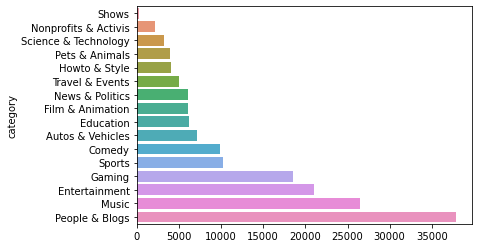

In [19]:
seaborn.barplot(y=topCategory.index, x = topCategory.values)

### Moyenne des temps des videos par catégorie
Y a t'il des catégories de videos qui sont en moyenne plus ou moins longues?

In [20]:
CategoryMeanTime=dfYoutubeVideo.groupby("category").duration.mean().sort_values()
CategoryMeanTime

category
Pets & Animals          122.269458
Autos & Vehicles        143.593554
Comedy                  153.874494
Travel & Events         205.762860
Entertainment           227.420190
People & Blogs          231.890075
Sports                  233.242775
Howto & Style           234.764922
Music                   256.520972
Film & Animation        262.302489
Science & Technology    333.686299
News & Politics         349.087921
Gaming                  473.216970
Education               479.764554
Nonprofits & Activis    569.261211
Shows                   596.119048
Name: duration, dtype: float64

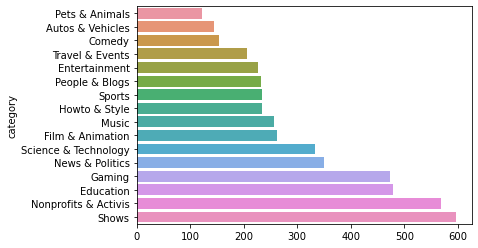

In [21]:
seaborn.barplot(y=CategoryMeanTime.index,x=CategoryMeanTime.values)

### Codecs des vidéos Youtubes
Quel est le type de codec le plus représenté/le moins représenté dans les vidéos Youtubes ?

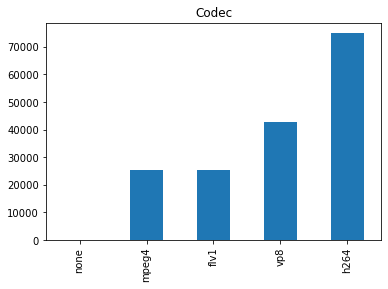

In [22]:
dataSerie = pd.Series(dfYoutubeVideo.codec)
dataSerie.sort_values()
x = dataSerie.value_counts()
x = x.sort_values()
title="Codec"
x.plot(kind="bar", title=title)

### Représentation de la Fréquence d'images (nombre d'images à la seconde) dans les vidéos Youtubes dataset

In [23]:
frameRate = dfYoutubeVideo["frame rate"].value_counts().sort_values()
frameRate

54.42        1
39.25        1
10.16        1
21.56        1
24.86        1
         ...  
29.92     5987
12.00    24761
25.00    28230
30.00    33212
29.97    47710
Name: frame rate, Length: 1145, dtype: int64

### Temps d'une video en fonction de son bitrate

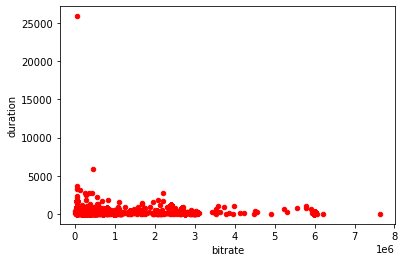

In [24]:
dfTranscodingMes.plot(kind='scatter',x='bitrate',y='duration',color='red')
plt.show()

On ne remarque pas forcément de lien entre le bitrate et le temps de la vidéo

## II.4) Merge des 2 dataset ( dfTranscodingMes et dfYoutubeVideo)

Nous avons décidé de merger les 2 sous datasets pour avoir des données complètes sur les vidéos étudiées.
En effet le dataset YoutubeVido contient des infomations générales sur des vidéos Youtubes et l'autre dataset contient des informations sur les transcodages de certaines de ces vidéos Youtubes.

In [3]:
dfFinal = pd.merge(left=dfTranscodingMes,right=dfYoutubeVideo[['id', 'category']], how='left', left_on='id', right_on='id')
dfFinal.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime,category
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,176,144,22508,0.612,Gaming
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,176,144,22508,0.612,Gaming
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,176,144,22508,0.612,Gaming
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,176,144,22508,0.612,Gaming
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,0,889537,mpeg4,56000,12.0,176,144,22508,0.612,Gaming


## II.5) Observation sur les mesures de transcodage des vidéos Youtubes du dataset mergé


In [26]:
dfFinal['id'].nunique()

1099

1099 Vidéos Youtube du dataset video_youtubes.tsv sont réutilisées dans le datset transcoding_mesurement.tsv pour les test de mesures de transcodage.

### Catégories des vidéos les plus/moins longues
Dans cet échantillon, quels sont en moyenne les catégories de vidéos les plus/moins longues?

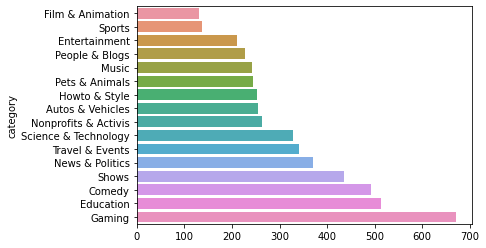

In [27]:
CategoryMeanTime2=dfFinal.groupby("category").duration.mean().sort_values()
seaborn.barplot(y=CategoryMeanTime2.index,x=CategoryMeanTime2.values)

### Classement par type de codec dans l'échantillon des vidéos youtubes du dataset  avant et après transcodage
Quels sont les types de codec les plus représentés/les moins représentés avant et après transcodage?

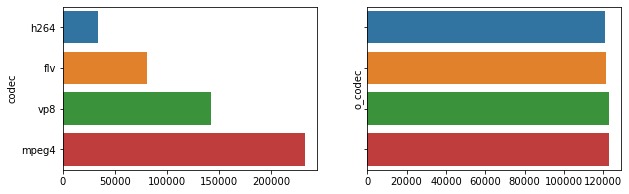

In [28]:
CodecBfrTrans=dfFinal.groupby("codec").codec.count().sort_values()
CodecAftrTrans=dfFinal.groupby("o_codec").o_codec.count().sort_values()

CodecBfrTrans=dfFinal.groupby("codec").codec.count().sort_values()
CodecAftrTrans=dfFinal.groupby("o_codec").o_codec.count().sort_values()


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 3)) 
seaborn.barplot(y=CodecBfrTrans.index,x=CodecBfrTrans.values,ax=ax1)
seaborn.barplot(y=CodecAftrTrans.index,x=CodecAftrTrans.values,ax=ax2)

### Répartition du temps de transcodage

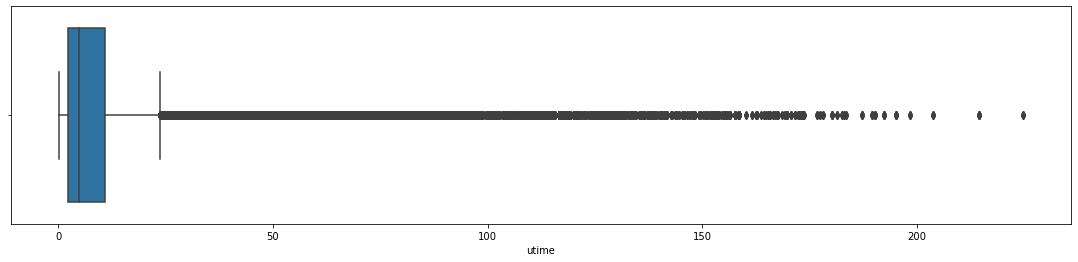

In [29]:
plt.figure(figsize=(19,4))
seaborn.boxplot(x=dfFinal.utime);

On remaque que que 75% des valeur de temps de transcodage se consentrent à moins d'une dizaine de secondes et on remarque aussi que quellques veleurs vont de 25 à peu près 230 sec

### Répartition du temps de transcodage en fonction des codec , o_codec 
Le codec d'entrée ou de sortie a t'il une influence sur le temps lee transcodage d'une vidéo?

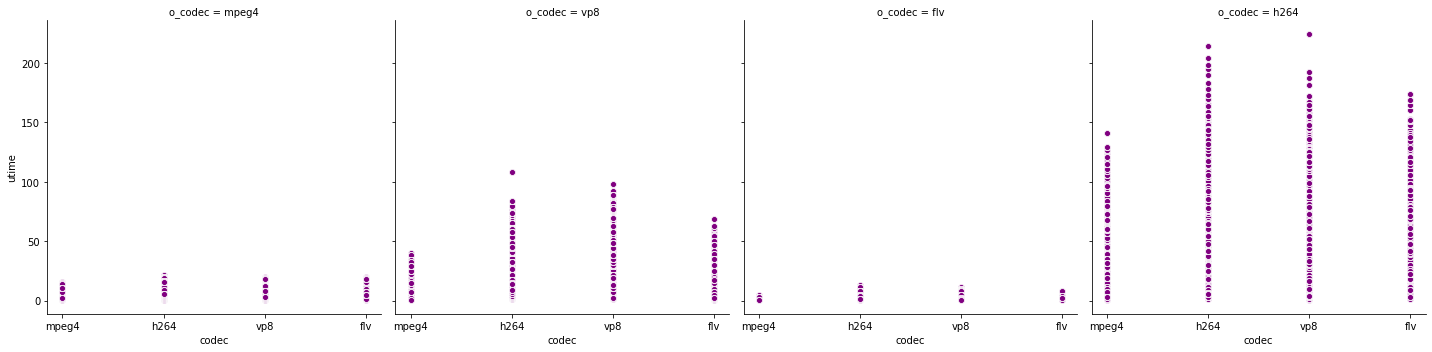

In [30]:
seaborn.relplot(x="codec", y="utime", col="o_codec", color = "purple", data=dfFinal);

On remarque pour les vidéos étudiées, le temps de transcodage peut monter assez haut pour des vidéos avec un codec de sortie h264 quelque soit le codec d'entrée. Pour les codec de sortie flv et mpeg4 on remarque que les temps de transcodages sont assez bas quelque soit le codec d'entrée.

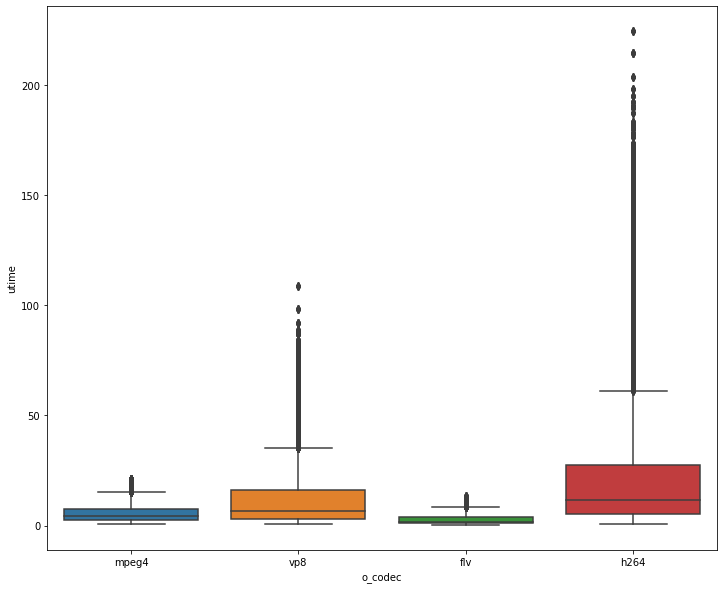

In [31]:
plt.figure(figsize=(12, 10))
seaborn.boxplot(y=dfFinal.utime,x=dfFinal.o_codec);

On remarque ici les mêmes observations que ci-dessus mais en ayant des informations plus précises sur la répartition de ces valeurs.

### Corrélations des variables numériques entres elles

In [32]:
dfFinal.corr()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
duration,1.000000,0.085803,0.063407,0.003437,-0.006504,0.785504,0.863464,0.051330,0.864414,0.466101,0.448764,NaN,0.458710,0.000114,0.001177,0.000169,0.000472,0.005061,0.003637
width,0.085803,1.000000,0.991893,0.812709,0.401701,0.079221,0.232766,-0.061632,0.230359,0.586399,0.548757,NaN,0.562129,-0.001030,-0.000175,-0.000162,-0.000136,0.045598,0.152003
height,0.063407,0.991893,1.000000,0.801874,0.456539,0.090249,0.225289,-0.065975,0.223058,0.574406,0.526786,NaN,0.540505,-0.001011,-0.000141,-0.000118,-0.000102,0.051701,0.151514
bitrate,0.003437,0.812709,0.801874,1.000000,0.262639,0.064547,0.099566,-0.043401,0.098726,0.437510,0.604404,NaN,0.603074,-0.001384,-0.000232,-0.000137,-0.000134,0.054584,0.177376
framerate,-0.006504,0.401701,0.456539,0.262639,1.000000,0.240018,0.327273,0.019728,0.326883,0.301865,0.206896,NaN,0.218190,-0.001817,0.000065,-0.000078,-0.000088,0.060531,0.090951
i,0.785504,0.079221,0.090249,0.064547,0.240018,1.000000,0.825621,0.105429,0.830476,0.553892,0.441853,NaN,0.459012,-0.001206,0.000634,0.000780,0.000877,0.033843,0.019384
p,0.863464,0.232766,0.225289,0.099566,0.327273,0.825621,1.000000,0.050113,0.999886,0.681785,0.634461,NaN,0.650268,-0.002261,0.000499,0.000215,0.000365,0.028011,0.033875
b,0.051330,-0.061632,-0.065975,-0.043401,0.019728,0.105429,0.050113,1.000000,0.063270,-0.030565,-0.026895,NaN,-0.026840,0.002971,-0.000233,-0.000092,-0.000052,0.004174,0.001768
frames,0.864414,0.230359,0.223058,0.098726,0.326883,0.830476,0.999886,0.063270,1.000000,0.680790,0.632593,NaN,0.648443,-0.002214,0.000499,0.000222,0.000372,0.028182,0.033760
i_size,0.466101,0.586399,0.574406,0.437510,0.301865,0.553892,0.681785,-0.030565,0.680790,1.000000,0.734348,NaN,0.768871,-0.003052,-0.000141,-0.000093,-0.000117,0.041272,0.075390


In [33]:
corr = dfFinal.corr()
corr.style.background_gradient(cmap='coolwarm')

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
duration,1.000000,0.085803,0.063407,0.003437,-0.006504,0.785504,0.863464,0.051330,0.864414,0.466101,0.448764,nan,0.458710,0.000114,0.001177,0.000169,0.000472,0.005061,0.003637
width,0.085803,1.000000,0.991893,0.812709,0.401701,0.079221,0.232766,-0.061632,0.230359,0.586399,0.548757,nan,0.562129,-0.001030,-0.000175,-0.000162,-0.000136,0.045598,0.152003
height,0.063407,0.991893,1.000000,0.801874,0.456539,0.090249,0.225289,-0.065975,0.223058,0.574406,0.526786,nan,0.540505,-0.001011,-0.000141,-0.000118,-0.000102,0.051701,0.151514
bitrate,0.003437,0.812709,0.801874,1.000000,0.262639,0.064547,0.099566,-0.043401,0.098726,0.437510,0.604404,nan,0.603074,-0.001384,-0.000232,-0.000137,-0.000134,0.054584,0.177376
framerate,-0.006504,0.401701,0.456539,0.262639,1.000000,0.240018,0.327273,0.019728,0.326883,0.301865,0.206896,nan,0.218190,-0.001817,0.000065,-0.000078,-0.000088,0.060531,0.090951
i,0.785504,0.079221,0.090249,0.064547,0.240018,1.000000,0.825621,0.105429,0.830476,0.553892,0.441853,nan,0.459012,-0.001206,0.000634,0.000780,0.000877,0.033843,0.019384
p,0.863464,0.232766,0.225289,0.099566,0.327273,0.825621,1.000000,0.050113,0.999886,0.681785,0.634461,nan,0.650268,-0.002261,0.000499,0.000215,0.000365,0.028011,0.033875
b,0.051330,-0.061632,-0.065975,-0.043401,0.019728,0.105429,0.050113,1.000000,0.063270,-0.030565,-0.026895,nan,-0.026840,0.002971,-0.000233,-0.000092,-0.000052,0.004174,0.001768
frames,0.864414,0.230359,0.223058,0.098726,0.326883,0.830476,0.999886,0.063270,1.000000,0.680790,0.632593,nan,0.648443,-0.002214,0.000499,0.000222,0.000372,0.028182,0.033760
i_size,0.466101,0.586399,0.574406,0.437510,0.301865,0.553892,0.681785,-0.030565,0.680790,1.000000,0.734348,nan,0.768871,-0.003052,-0.000141,-0.000093,-0.000117,0.041272,0.075390


### Zoom sur la corrélation de la variable utime avec les autres variables


In [34]:
utimeCorrMatrix = dfFinal.corr().utime.sort_values()
utimeCorrMatrix

b              0.001768
duration       0.003637
i              0.019384
frames         0.033760
p              0.033875
i_size         0.075390
framerate      0.090951
o_framerate    0.104926
size           0.108972
p_size         0.109510
height         0.151514
width          0.152003
o_bitrate      0.154949
bitrate        0.177376
o_height       0.515267
o_width        0.518897
umem           0.658152
utime          1.000000
b_size              NaN
Name: utime, dtype: float64

### Zoom sur les corrélations entre utime et certaines variables (umem, o_width et o_heigt,duration )

####  a) umem

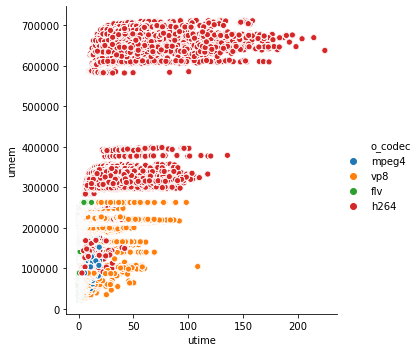

In [35]:
seaborn.relplot(x="utime", y="umem", hue="o_codec", data=dfFinal);

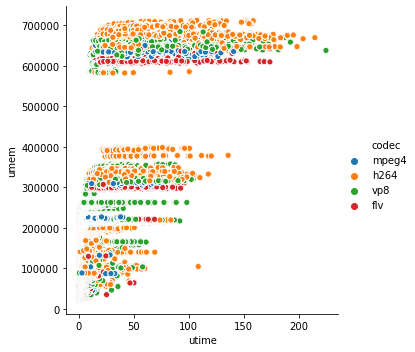

In [36]:
seaborn.relplot(x="utime", y="umem", hue="codec", data=dfFinal);

On remarque ici que plus le temps de transcodage est long, plus la mémoire allouée pour celui-ci est grande.De plus on observe aussi, de la même manière que précedemment, que le trancodage avec des o_codec h264 ont besoin en général une mémoire allouée plus grande que les autres transcodages avec d'autres codec de sortie.
On en déduit donc que le type du codec de sortie peut avoir une influence sur le temps de transcodage et la mémoire allouée et que donc les 2 sont corélées.

#### b) o_width et o_height


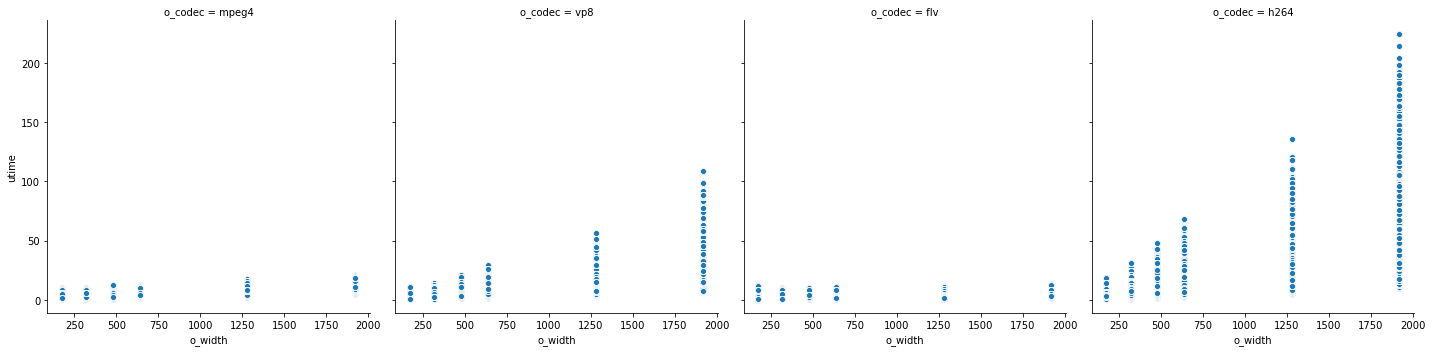

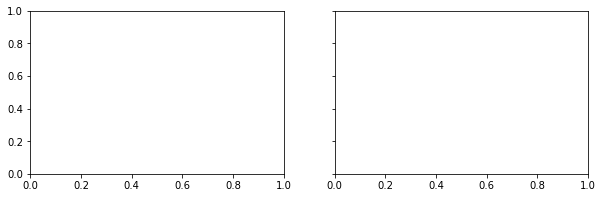

In [4]:
seaborn.relplot(x="o_width", y="utime",
            col="o_codec", data=dfFinal);

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 3)) 

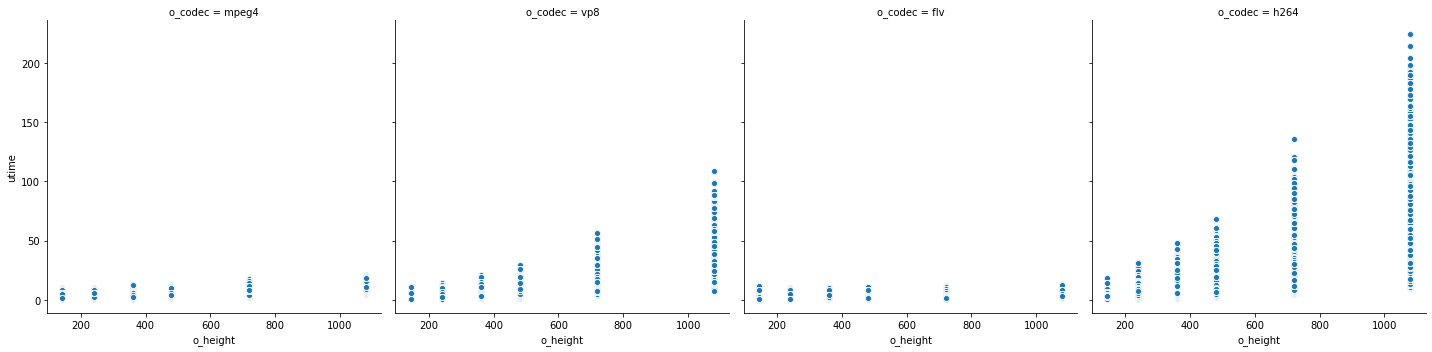

In [5]:
seaborn.relplot(x="o_height", y="utime",
            col="o_codec", data=dfFinal);

On remarque ici aussi les observation par rapport au type de o_codec. 
En ce qui concerne la corrélation entre o_width,o_eight et utime, on observe pour chaque type de o_codec une augmentation du temps de trenscodage quand la largeur en pixel de la vidéo augmente.Il en est de meme pour la hauteur.On en déduit que plus la résolution de la vidéo après transcodage augmente plus le temps de transcodage est long.

#### c) birate 

In [ ]:
seaborn.relplot(x="o_bitrate", y="utime",color= "red", data=dfFinal);

Ici nous pouvons voir qu'il a une corrélation entre le bitrate de sortie de la vidéo et le temps de transcodage.Cependant, il est un peu moins frappant que pour les variables précedentes.

#### d) duration  

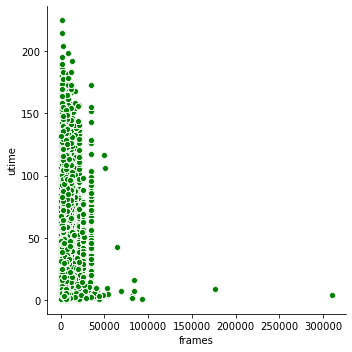

In [38]:
seaborn.relplot(x="frames", y="utime",color= "green", data=dfFinal);

La corrélation entre les 2 variables n'est pas flangrantes et nous ne pouvons pas réellement émmetre d'hypthèse

# III) Modélisation

 TARGET : Utime = temps de transcodage

## III.1) Fonction utile


  La fonction print_time sert à afficher l'heure à laquelle on execute la fonction

In [50]:
def print_time():
    """
    Affiche et retourne l'heure de la machine.
    Utilisé pour mesurer le temps d'execution du classifieur.
    """
    import time
    import datetime
    t = datetime.datetime.now().time()
    print(t.isoformat()[:8])
    return time.time()
print_time()

19:13:30


1610043210.6945577

In [70]:
from sklearn.model_selection import train_test_split

from sklearn import datasets, metrics
import seaborn as sns
import pickle 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
#import mglearn 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import time
import datetime
#import xgboost as xg 

from sklearn import datasets, metrics
import seaborn as sns
import pickle 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import mglearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
import xgboost as xg 

## III.2) Transformation du dataset pour les modèles


Le dataset dispose de colonnes string qui poserons problème pour l’exécution des modèles on décide de créer des colonnes pour chaque string qui ressort 0 si il n’y a pas la valeur et 1 sinon (one hot encoding)

In [39]:
codec_model = pd.get_dummies(dfFinal.codec, prefix='Codec')
o_codec_model = pd.get_dummies(dfFinal.o_codec, prefix='o_Codec')
category_model = pd.get_dummies(dfFinal.category, prefix='category')

dfForModel = pd.concat([dfFinal, codec_model,category_model,o_codec_model], axis=1)
dfForModel = dfForModel.drop(['id', 'codec', 'o_codec', 'category', 'b_size'], axis=1)
print(dfForModel.columns)

Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate',
       'o_width', 'o_height', 'umem', 'utime', 'Codec_flv', 'Codec_h264',
       'Codec_mpeg4', 'Codec_vp8', 'category_Autos & Vehicles',
       'category_Comedy', 'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Music', 'category_News & Politics',
       'category_Nonprofits & Activis', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Shows', 'category_Sports', 'category_Travel & Events',
       'o_Codec_flv', 'o_Codec_h264', 'o_Codec_mpeg4', 'o_Codec_vp8'],
      dtype='object')


In [40]:
dfForModel.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,...,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_Codec_flv,o_Codec_h264,o_Codec_mpeg4,o_Codec_vp8
0,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,...,0,0,0,0,0,0,0,0,1,0
1,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,...,0,0,0,0,0,0,0,0,1,0
2,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,...,0,0,0,0,0,0,0,0,1,0
3,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,...,0,0,0,0,0,0,0,0,1,0
4,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,...,0,0,0,0,0,0,0,0,1,0


In [46]:
dfForModel.columns

Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'size', 'o_bitrate', 'o_framerate',
       'o_width', 'o_height', 'umem', 'utime', 'Codec_flv', 'Codec_h264',
       'Codec_mpeg4', 'Codec_vp8', 'category_Autos & Vehicles',
       'category_Comedy', 'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Music', 'category_News & Politics',
       'category_Nonprofits & Activis', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Shows', 'category_Sports', 'category_Travel & Events',
       'o_Codec_flv', 'o_Codec_h264', 'o_Codec_mpeg4', 'o_Codec_vp8'],
      dtype='object')

## III.3) Split en train et test

On sépare ensuite le dataset en deux X qui correspond au features et Y la target a prédire
On sépare ensuite le dataset en train et test en 80% / 20%


In [45]:
X=dfForModel
X=X.drop(["utime"],1)
Y=dfForModel['utime']
Y=pd.DataFrame(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

## III.4)  Modèles testés

Notre problème est un problème de regression car la target à prédire n'a pas de valeurs binaire mais des float. Nous décidons de tester plusieurs modèles:
- Régression Linéaire
- Random Forest
- GridSearch avec Random Forest
- KNN
- XGBOOST

Nous choisissons Mean_square_error(MSE) ainsi que l'accuracy R² comme évaluateur pour tous nos modèles. Un MSE parfait vaut 0 et un R² parfait vaut 1

-------------------------------------------------------------------------------------------------------------------------------
### III.4.1)Régression linéaire
-------------------------------------------------------------------------------------------------------------------------------

On fit le modèle au train set et on calcul le R2 et le MSE.

In [102]:
mean_sqrt_error_linearReg=[]
acc_reg_lin = []

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

start_time = print_time()
#Make predictions using the testing set
y_pred = regr.predict(X_test)
end_time = print_time()


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f'
      % r2_score(Y_test, y_pred))

mean_sqrt_error_linearReg.append(mean_squared_error(Y_test, y_pred))
acc_reg_lin.append(r2_score(Y_test, y_pred))
print ("\nDuration time :", end_time - start_time)


22:06:43
22:06:43
Coefficients: 
 [[ 9.02778217e-04  6.71218091e-03 -8.55810934e-03  1.41417900e-06
   1.24698209e-01  1.15785101e-03 -4.89791225e-04 -2.70031508e-04
   3.98152633e-04 -9.24379407e-07 -7.70703976e-07  7.69012118e-07
   1.43707536e-06  2.54262431e-01  6.69320902e-03  5.05909555e-03
   7.36945526e-05  8.52264621e-02 -5.09918907e-02  3.25446149e-01
  -3.59680721e-01 -1.25265773e+00 -2.38491759e+00  9.12948362e+00
  -9.59889775e-01 -3.56346656e+00  3.71396111e+00  1.28717368e+01
  -3.02462484e+00 -4.44957981e-01 -3.64010267e+00 -1.27825184e+00
  -1.41581305e+00 -4.63968042e+00 -1.95071912e+00 -2.54516995e+00
   1.38507000e+00 -5.82186687e+00  5.95851270e+00 -3.18530006e+00
   3.04865423e+00]]
Mean squared error: 89.66
R2: 0.66

Duration time : 0.033498525619506836


 Enregistement du modèle dans un fichier Pickles et plots

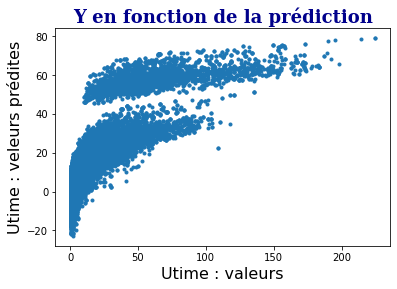

Text(0.5, 1.0, "Y en fonction de l'erreur de la prédiction")

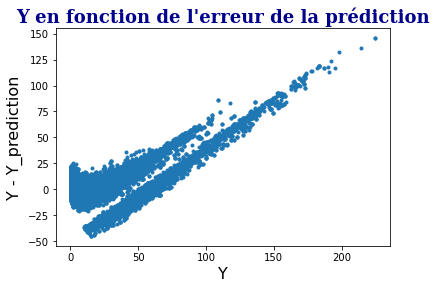

In [101]:
pickle.dump(regr, open('apiflask/models/final_prediction_RegLin.pickle', 'wb'))

plt.plot( Y_test,y_pred,'.')
plt.xlabel("Utime : valeurs", size = 16,)
plt.ylabel("Utime : veleurs prédites", size = 16)
plt.title("Y en fonction de la prédiction", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
plt.show()

plt.plot( Y_test,Y_test-y_pred,'.')
plt.xlabel("Y", size = 16,)
plt.ylabel("Y - Y_prediction", size = 16)
plt.title("Y en fonction de l'erreur de la prédiction", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

 Avec un R2 de 0.66 et un MSE de 89 on remarque que les prédictions éffectuées par le modèle ne sont pas excellentes meme si celle-ci ne sont pas catastrophiques et même plutôt bien pour un modèle tel que celui-ci.
 
 De plus, les graphiques viennent appuyer cette idée : dans le graphique 1, un modèle parfait aurait donné une ligne de point droite et dans la diagonal passant par 0. Dans le graphique 1 , un modèle parfait aurait donné une ligne horizontale de valeur 0.

-------------------------------------------------------------------------------------------------------------------------------
### III.4.2)Random Forest
-------------------------------------------------------------------------------------------------------------------------------

Nous appliquons le modèle en faisant varier le nombre d'estimateurs entre 7 valeurs choisis au hasard entre 1 et 650. L'objectif étant de voir l'évolution de la prediction et de trouver une valeur pour laquelle elle est optimal.
Nous exécutons RandomForestRegressor sur les valeurs de train, ensuite on fit le modèle et on fait la prédiction sur X_test.
On calcul la mean_square_error ainsi que l’accuracy par rapport à Y_test.




#### A) modèle de base

In [52]:
 parameters = [1,10, 23, 43, 87, 100,650]

In [54]:
mean_sqrt_error_random_forest=[]
accuracy_random_forest=[]
start_time = print_time()
for i in range(len(parameters)):
  print(i)
  regressor = RandomForestRegressor(n_estimators=parameters[i], random_state = 42,max_depth=32, n_jobs=-1)
  regressor.fit(X_train, Y_train)
  y_pred = regressor.predict(X_test)
  mean_sqrt_error_random_forest.append(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
  accuracy_random_forest.append(regressor.score(X_test, Y_test))
end_time = print_time()
print ("\nDuration time :", end_time - start_time)

19:32:39
0
1
2
3
4
5
6
19:49:42

Duration time : 1023.0794982910156


On enregistre les données dans des fichiers pickle afin de les conserver pour la suite. On a lancé le modèle sans puis avec hyperparamètre. On affiche les deux afin de les comparer

In [56]:
pickle.dump( mean_sqrt_error_random_forest, open( "mean_sqrt_error_random_forest_HP.p", "wb" ) )
pickle.dump( accuracy_random_forest, open( "acc_random_forest_HP.p", "wb" ) )
pickle.dump(regressor, open('apiflask/models/final_prediction_RF.pickle', 'wb'))

In [59]:
mean_sqrt_error_random_forest=pickle.load( open( "mean_sqrt_error_random_forest.p", "rb" ) )
accuracy_random_forest=pickle.load( open( "acc_random_forest.p", "rb" ) )
mean_sqrt_error_random_forest_HP=pickle.load( open( "mean_sqrt_error_random_forest_HP.p", "rb" ) )
accuracy_random_forest_HP=pickle.load( open( "acc_random_forest_HP.p", "rb" ) )

Nous affichons les valeurs de l'erreur et de la precision.
Les valeurs sont plutôt intéréssantes car MSE tend vers 0 et R² vers 1.

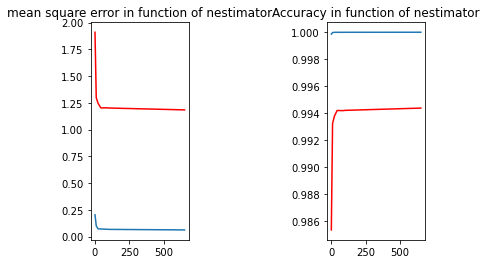

In [60]:
#Mean square error must be near 0
plt.subplot(131)
plt.plot(parameters,mean_sqrt_error_random_forest)
plt.plot(parameters,mean_sqrt_error_random_forest_HP,"r")
plt.title("mean square error in function of nestimator")
plt.subplot(133)
plt.plot(parameters,accuracy_random_forest)
plt.plot(parameters,accuracy_random_forest_HP,"r")
plt.title("Accuracy in function of nestimator")

plt.show()

On affiche aussi les valeurs de Y_test et Y_pred pour vérifier leur proximité. 

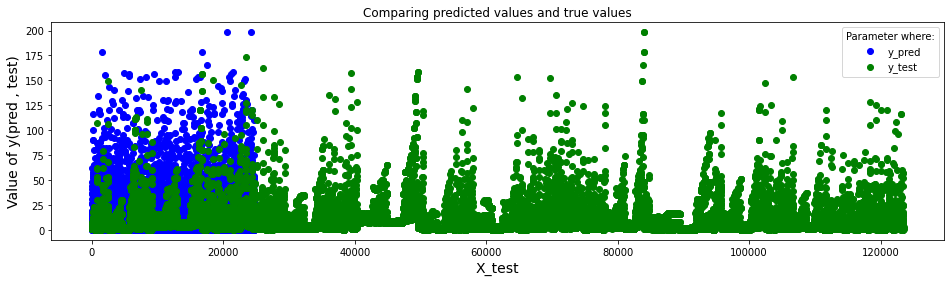

In [23]:
plt.figure(figsize=(16,4))
plt.plot(y_pred,'bo',  label='y_pred')
plt.plot(Y_test,'go', label='y_test')
plt.xlabel('X_test', fontsize=14)
plt.ylabel('Value of y(pred , test)', fontsize=14)
plt.title('Comparing predicted values and true values')
plt.legend(title='Parameter where:')
plt.show()

On constate que certaines valeurs de sont pas bien prédites même si le modèle a un R2 très proche de 1. On aimerais regarder par la suite si on pourrait éventuellement améliorer encore plus le modèle.

#### B) Faire évoluer le modèle en prenant en compte les importances des features

Nous cherchons à determiner les colonnes importantes au modèle afin d’améliorer la prédiction. 

In [24]:
# Get numerical feature importances
# List of features for later use
feature_list = list(df_train.columns)
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: umem                 Importance: 0.53
Variable: o_bitrate            Importance: 0.15
Variable: o_Codec_mpeg4        Importance: 0.06
Variable: bitrate              Importance: 0.05
Variable: p_size               Importance: 0.04
Variable: o_framerate          Importance: 0.04
Variable: o_width              Importance: 0.04
Variable: o_height             Importance: 0.04
Variable: framerate            Importance: 0.01
Variable: i_size               Importance: 0.01
Variable: category_Travel & Events Importance: 0.01
Variable: o_Codec_flv          Importance: 0.01
Variable: o_Codec_h264         Importance: 0.01
Variable: duration             Importance: 0.0
Variable: width                Importance: 0.0
Variable: height               Importance: 0.0
Variable: i                    Importance: 0.0
Variable: p                    Importance: 0.0
Variable: b                    Importance: 0.0
Variable: frames               Importance: 0.0
Variable: size                 Importance: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

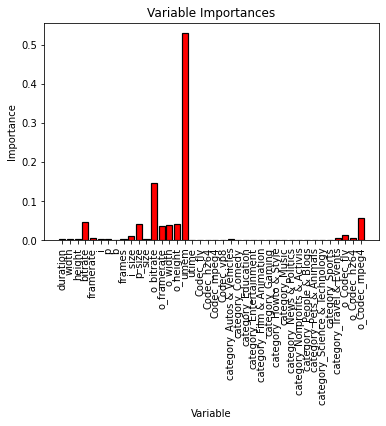

In [25]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [26]:
feature_importances

[('umem', 0.53),
 ('o_bitrate', 0.15),
 ('o_Codec_mpeg4', 0.06),
 ('bitrate', 0.05),
 ('p_size', 0.04),
 ('o_framerate', 0.04),
 ('o_width', 0.04),
 ('o_height', 0.04),
 ('framerate', 0.01),
 ('i_size', 0.01),
 ('category_Travel & Events', 0.01),
 ('o_Codec_flv', 0.01),
 ('o_Codec_h264', 0.01),
 ('duration', 0.0),
 ('width', 0.0),
 ('height', 0.0),
 ('i', 0.0),
 ('p', 0.0),
 ('b', 0.0),
 ('frames', 0.0),
 ('size', 0.0),
 ('utime', 0.0),
 ('Codec_flv', 0.0),
 ('Codec_h264', 0.0),
 ('Codec_mpeg4', 0.0),
 ('Codec_vp8', 0.0),
 ('category_Autos & Vehicles', 0.0),
 ('category_Comedy', 0.0),
 ('category_Education', 0.0),
 ('category_Entertainment', 0.0),
 ('category_Film & Animation', 0.0),
 ('category_Gaming', 0.0),
 ('category_Howto & Style', 0.0),
 ('category_Music', 0.0),
 ('category_News & Politics', 0.0),
 ('category_Nonprofits & Activis', 0.0),
 ('category_People & Blogs', 0.0),
 ('category_Pets & Animals', 0.0),
 ('category_Science & Technology', 0.0),
 ('category_Sports', 0.0)]

L'étape suivante était de regarder l'importance des colonnes afin de voir si celles-ci ont un impact dans la prédiction. Pour pouvoir éxecuter le modèle nous avons dû transformer les colonnes string en booléen (one hot encoding). Lors du calcul de l'importance des colonnes toutes ces colonnes booléennes crées ont donc une importance faible. Or d'après les visualisation de la partie précedente, 'o_coedc' pourrait avoir une certaine influence sur le temps de transcodage. Nous décidons quand même d'enlever cette feature ainsi que les autres features 'string' de base pour voir si le modèle a des résultas qui varient.

In [31]:
df_colonne_imp=dfTranscodingMesMerge[['umem','o_bitrate','p_size','width','b_size','size','frames','height','b']]
df_colonne_imp

,umem,o_bitrate,p_size,width,b_size,size,frames,height,b
0,22508,56000,825054,176,0,889537,1564,144,0
1,25164,56000,825054,176,0,889537,1564,144,0
2,29228,56000,825054,176,0,889537,1564,144,0
3,34316,56000,825054,176,0,889537,1564,144,0
4,58528,56000,825054,176,0,889537,1564,144,0
...,...,...,...,...,...,...,...,...,...
123498,88708,539000,9456514,320,0,11215178,6242,240,0
123499,88708,539000,9456514,320,0,11215178,6242,240,0
123500,88708,539000,9456514,320,0,11215178,6242,240,0
123501,88724,539000,60113035,1280,0,65359329,5503,720,0


On relance le split en train et test et l’exécution du modèle pour les différents estimateurs


In [32]:
X=df_colonne_imp
Y=dfTranscodingMesMerge['utime']
Y=pd.DataFrame(Y)
X_train_Imp, X_test_Imp, Y_train_Imp, Y_test_Imp = train_test_split(X, Y, test_size=0.20)

In [33]:
parameters = [1,10, 23, 43, 87, 100,650]
mean_sqrt_error_random_forest_imp=[]
accuracy_random_forest_imp=[]
start_time = print_time()
for i in range(len(parameters)):
  print(i)
  regressor = RandomForestRegressor(n_estimators=parameters[i], random_state = 42)
  regressor.fit(X_train_Imp, Y_train_Imp)
  y_pred_Imp = regressor.predict(X_test_Imp)
  mean_sqrt_error_random_forest_imp.append(np.sqrt(metrics.mean_squared_error(Y_test_Imp, y_pred_Imp)))
  accuracy_random_forest_imp.append(regressor.score(X_test_Imp, Y_test_Imp))
end_time = print_time()
print ("\nDuration time :", end_time - start_time)

16:27:47
0
1
2
3
4
5
6
16:30:10

Duration time : 143.7336151599884


In [34]:
mean_sqrt_error_random_forest_imp
accuracy_random_forest_imp

[0.7724354712068868,
 0.7921629702294087,
 0.7941220173031233,
 0.794247830791024,
 0.7947246712685149,
 0.7945282354278439,
 0.7946478023484475]

In [35]:
pickle.dump( mean_sqrt_error_random_forest_imp, open( "mean_sqrt_error_random_forest_imp.p", "wb" ) )
pickle.dump( accuracy_random_forest_imp, open( "acc_random_forest_imp.p", "wb" ) )
pickle.dump(regressor, open('apiflask/models/final_prediction_RF2.pickle', 'wb'))

In [61]:
mean_sqrt_error_random_forest_imp=pickle.load( open( "mean_sqrt_error_random_forest_imp.p", "rb" ) )
accuracy_random_forest_imp=pickle.load( open( "acc_random_forest_imp.p", "rb" ) )

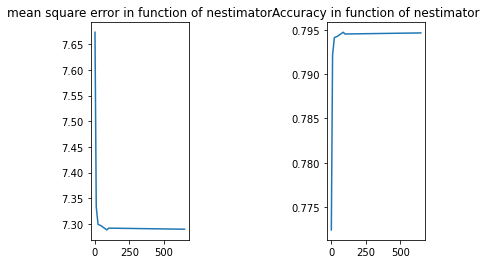

In [37]:
#Mean square error must be near 0
plt.subplot(131)
plt.plot(parameters,mean_sqrt_error_random_forest_imp)
plt.title("mean square error in function of nestimator")
plt.subplot(133)
plt.plot(parameters,accuracy_random_forest_imp)
plt.title("Accuracy in function of nestimator")
plt.show()

On remarque que les valeurs d 'évaluations sont moins bonnes que le modèle de base ou nous avions pris toutes les features. On peut en déduire que ces features comme o_codec jouent un rôle dans la précision du modèle. On décide donc de garder toute les features dans les modèles suivants.

#### C) Grid search du Random forest

Nous appliquons l'algorithme GridSearch avec RandomForestRegressor. Nous l'appliquons sur 3 n_estimateurs différents et ressortons le R² ainsi que MSE.
On veut voir avec cette grille de rechercher différents paramètres possibles pour le modèle Random Forest et voir ce que l'algorihme trouve comme meilleur solution

In [ ]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("mean square error score:",metrics.mean_squared_error(y_test,y_predict))
    return y_test,y_predict


On répète l'oppération 5 fois afin de voir l'évolution du modèle.

In [ ]:
start_time = print_time()

for i in range(5):
    print("Loop: " , i)
    print("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, Y_train)
    print("ok")
    Y_test , y_pred = RFR(X_train, X_test, Y_train, Y_test, best_params)
    print("Best Score:" ,best_score)
    print("Best params:",best_params)
    #Mean square error must be near 0

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

plt.subplot(131)
plt.plot(mean_square_error_grid_search)

plt.title("mean square error ")
plt.subplot(133)
plt.plot(accuracy_grid_seach)
plt.title("Accuracy ")
plt.show()


15:52:04
Loop:  0
--------------
ok
mean square error score: 1.2672849274494338
Best Score: 0.9935543611072077
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  1
--------------
ok
mean square error score: 1.2748322650684127
Best Score: 0.9936409308624319
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  2
--------------
ok
mean square error score: 1.35705248118415
Best Score: 0.9937369401830137
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  3
--------------
ok
mean square error score: 1.329050971367915
Best Score: 0.9935942529399309
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  4
--------------
ok
mean square error score: 1.2650850817355737
Best Score: 0.9936191542901828
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2,

L'algorithme a trouvé une meilleure solution qui a un score R2 qui vaut plus de 0.9936 et un MSE à 1.2651 avec les paramètres suivants : bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30.

On remarque que ce socre est asssez proche du Random Forest de départ. La grid search n'était peut-etre pas nécessaire car les résultats de base étaient deja très concluants.


On enregistre les résultats des tests effectués dans la grid search dans des tableaux

In [ ]:
mean_square_error_grid_search=[1.2672849274494338,1.2748322650684127,1.35705248118415,1.329050971367915,1.2650850817355737]
accuracy_grid_seach=[0.9935543611072077,0.9936409308624319,0.9937369401830137,0.9935942529399309,0.9936191542901828]

-------------------------------------------------------------------------------------------------------------------------------
### III.4.1) KNN
-------------------------------------------------------------------------------------------------------------------------------

On choisi d’appliquer le modèle K Neighbors aux données. On fait varier le nombre de voisin de 1 à 10.
On calcul l’accuracy et la mean_square_error



In [38]:
Neighbors = [1, 2, 3,4,5,6,7,8,9,10]
mean_sqrt_error_knn=[]
accuracy_knn=[]
start_time = print_time()
for k in Neighbors:
  regressor = KNeighborsRegressor(n_neighbors=k,leaf_size=30,n_jobs=-1)
  #regressor = KNeighborsRegressor(n_neighbors=k)
  regressor.fit(X_train, Y_train) 
  y_pred=regressor.predict(X_test)
  mean_sqrt_error_knn.append(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
  accuracy_knn.append(regressor.score(X_test, Y_test))

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

16:31:40
16:33:02

Duration time : 81.12048649787903


In [39]:
accuracy_knn

[0.8683547768566519,
 0.8931581033508814,
 0.8980330890374557,
 0.8925087160769785,
 0.8878454462064367,
 0.8805169521168196,
 0.8695612901717744,
 0.859407222165067,
 0.848486648377997,
 0.8372641336696813]

On lance le modèle avec et sans hyper paramètre on affiche les deux afin de les comparer

In [40]:
pickle.dump( mean_sqrt_error_knn, open( "mean_sqrt_error_KNN_HP.p", "wb" ) )
pickle.dump( accuracy_knn, open( "acc_KNN_HP.p", "wb" ) )
pickle.dump( regressor, open( "final_prediction_KNN.p", "wb" ) )

In [62]:
mean_sqrt_error_knn=pickle.load( open( "mean_sqrt_error_KNN.p", "rb" ) )
accuracy_knn=pickle.load( open( "acc_KNN.p", "rb" ) )
mean_sqrt_error_knn_HP=pickle.load( open( "mean_sqrt_error_KNN_HP.p", "rb" ) )
accuracy_knn_HP=pickle.load( open( "acc_KNN_HP.p", "rb" ) )

In [42]:
print(mean_sqrt_error_knn)
print(mean_sqrt_error_knn_HP)

[4.705379419005459, 4.312428085383092, 4.2382740248550785, 4.3863950909202565, 4.58275043296176, 4.826513443358335, 5.111352610269486, 5.371951180642167, 5.6197193505342655, 5.865742998894981]
[5.723793425366447, 5.1564664149862365, 5.037453269045186, 5.172113230738779, 5.283112452937126, 5.452988040501886, 5.69750409814459, 5.915111082811313, 6.140544056244426, 6.363895492658096]


Ici encore nous executons le modèle sans puis avec hyperparamètres afin de constater une évolution. On calcul l’accuracy R2 et la mean_square_error pour chaque essaie. Les valeurs de MSE sont assez élevés par rapport à celui du random forest.Le R² a une valeur objectivement haute (max : 0.92) , mais moins que celle du Random Forest. Ensuite en y ajoutant des hyperparamètres (ici leaf_size=30,n_jobs=-1), nous constatons une baisse des performances lorsque l'on regarde le R2 et le MSE. On en conclue que le KNN simple est une meilleur solution. Mais ce modèle reste moins performant que les précédents modèles.Le temps d'éxécution, lui, est rapide.

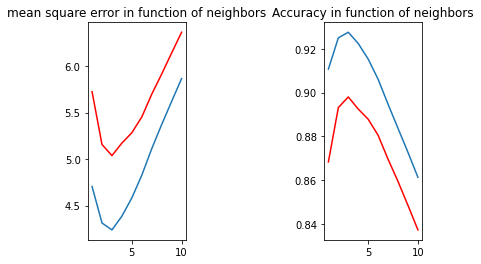

In [43]:
#Mean square error must be near 0
plt.subplot(131)
plt.plot(Neighbors,mean_sqrt_error_knn)
plt.plot(Neighbors,mean_sqrt_error_knn_HP,'r')
plt.title("mean square error in function of neighbors")
plt.subplot(133)
plt.plot(Neighbors,accuracy_knn)
plt.plot(Neighbors,accuracy_knn_HP,'r')
plt.title("Accuracy in function of neighbors")
plt.show()

On choisi aussi d’afficher pour trois prédictions différentes les données train les données test et les prédictions

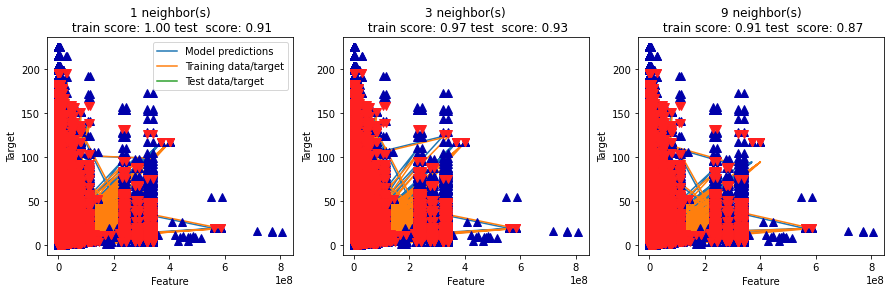

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 100).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    regressor.fit(X_train, Y_train)
    ax.plot(X_test, regressor.predict(X_test))
    ax.plot(X_train, Y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, Y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test  score: {:.2f}".format(n_neighbors,regressor.score(X_train, Y_train),regressor.score(X_test, Y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

-------------------------------------------------------------------------------------------------------------------------------
### III.4.1) GXBOOST
-------------------------------------------------------------------------------------------------------------------------------

Le modèle XGBOOST s'applique de la même manière que random forest. On choisi donc pour estimateurs les mêmes que ceux du random forest afin de pouvoir les comparer plus simplement.

In [71]:
parameters = [1,10, 23, 43, 87, 100,650]

In [78]:
mean_sqrt_error_XGBOOST=[]
accuracy_XGBOOST=[]
start_time = print_time()

for i in range(len(parameters)):
  print(i)
  regressor = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = parameters[i], seed = 123,gamma=10) 
  regressor.fit(X_train, Y_train)
  y_pred = regressor.predict(X_test)
  mean_sqrt_error_XGBOOST.append(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
  accuracy_XGBOOST.append(regressor.score(X_test, Y_test))
end_time = print_time()
print ("\nDuration time :", end_time - start_time)

20:35:42
0
[20:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
1
[20:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
2
[20:35:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
3
[20:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
4
[20:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
5
[20:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective

In [80]:
print(mean_sqrt_error_XGBOOST)
print(accuracy_XGBOOST)

[13.785029147091496, 3.0527283269212493, 1.9619384140238945, 1.540756392761303, 1.1707649859391647, 1.121773164028493, 0.8469353198196025]
[0.2793989877699702, 0.9646608740631202, 0.9854034495859675, 0.9909978250864138, 0.9948022074604267, 0.9952281192405342, 0.9972799306316104]


On enregistre dans des fichiers pickles le modèle et les accuracy et mse

In [84]:
pickle.dump( regressor, open( "final_prediction_XGBOOST_IMP.p", "wb" ) )

In [85]:
pickle.dump( mean_sqrt_error_XGBOOST, open( "mean_sqrt_error_XGBOOST_HP.p", "wb" ) )
pickle.dump( accuracy_XGBOOST, open( "acc_XGBOOST_HP.p", "wb" ) )

In [63]:
mean_sqrt_error_XGBOOST=pickle.load( open( "mean_sqrt_error_XGBOOST.p", "rb" ) )
accuracy_XGBOOST=pickle.load( open( "acc_XGBOOST.p", "rb" ) )
mean_sqrt_error_XGBOOST_HP=pickle.load( open( "mean_sqrt_error_XGBOOST_HP.p", "rb" ) )
accuracy_XGBOOST_HP=pickle.load( open( "acc_XGBOOST_HP.p", "rb" ) )

In [50]:
print(mean_sqrt_error_XGBOOST)
print(mean_sqrt_error_XGBOOST_HP)

[16.897229984132487, 9.247344775934478, 6.179987492011868, 4.914557245043385, 4.0195794800217834, 3.8871804836480157, 2.6156821166032516]
[16.883402686138073, 9.304007021597688, 6.220572473014676, 4.8835534809466585, 4.019961303021382, 3.8857824650627766, 2.6985672601757504]


On affiche les valeurs MSE et R². Celle-ci sont très bonnes. On exécute le modèle avec et sans hyperparamètre  (ici gamma=10), on affiche les deux afin de les comparer. On voir que le modèle avec les hyperparamètres donne de très bon résultats proche de 1.Ces résultats sont très proche du random forest effectué plus haut .

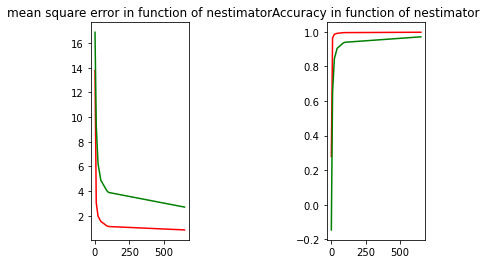

In [94]:
#Mean square error must be near 0
plt.subplot(131)
plt.plot(parameters,mean_sqrt_error_XGBOOST,'g')
plt.plot(parameters,mean_sqrt_error_XGBOOST_HP,'r')
plt.title("mean square error in function of nestimator")
plt.subplot(133)
plt.plot(parameters,accuracy_XGBOOST,'g')
plt.plot(parameters,accuracy_XGBOOST_HP,'r')
plt.title("Accuracy in function of nestimator")
plt.show()

# V) COMPARAISON DES MODELES


Nous decidons de creer un dataframe des valeurs de mean_square_error et accuracy pour chaque modèle évalué

In [88]:
dfComparaisonDesModèles["MSE_REG_LIN"]=pd.DataFrame(mean_sqrt_error_linearReg)
dfComparaisonDesModèles=pd.DataFrame(mean_sqrt_error_knn,columns=["MSE_KNN"])
dfComparaisonDesModèles["MSE_KNN_IMP"]=pd.DataFrame(mean_sqrt_error_knn_HP)
dfComparaisonDesModèles["MSE_RF"]=pd.DataFrame(mean_sqrt_error_random_forest)
dfComparaisonDesModèles["MSE_RF_IMP"]=pd.DataFrame(mean_sqrt_error_random_forest_imp)
dfComparaisonDesModèles["MSE_XGBOOST"]=pd.DataFrame(mean_sqrt_error_XGBOOST)
dfComparaisonDesModèles["MSE_XGBOOST_IMP"]=pd.DataFrame(mean_sqrt_error_XGBOOST_HP)

dfComparaisonDesModèles["ACC_REG_LIN"]=pd.DataFrame(acc_reg_lin)
dfComparaisonDesModèles["ACC_KNN"]=pd.DataFrame(accuracy_knn)
dfComparaisonDesModèles["ACC_KNN_IMP"]=pd.DataFrame(accuracy_knn_HP)
dfComparaisonDesModèles["ACC_RF"]=pd.DataFrame(accuracy_random_forest)
dfComparaisonDesModèles["ACC_RF_IMP"]=pd.DataFrame(accuracy_random_forest_imp)
dfComparaisonDesModèles["ACC_XGBOOST"]=pd.DataFrame(accuracy_XGBOOST)
dfComparaisonDesModèles["ACC_XGBOOST_IMP"]=pd.DataFrame(accuracy_XGBOOST_HP)


In [89]:
dfComparaisonDesModèles

,MSE_KNN,MSE_KNN_IMP,MSE_RF,MSE_RF_IMP,MSE_XGBOOST,MSE_XGBOOST_IMP,ACC_REG_LIN,ACC_KNN,ACC_KNN_IMP,ACC_RF,ACC_RF_IMP,ACC_XGBOOST,ACC_XGBOOST_IMP
0,4.705379,5.723793,0.203098,7.673617,16.883403,13.785029,0.660006,0.910760,0.868355,0.999845,0.772435,-0.145400,0.279399
1,4.312428,5.156466,0.099969,7.333466,9.304007,3.052728,NaN,0.925042,0.893158,0.999962,0.792163,0.652162,0.964661
2,4.238274,5.037453,0.072433,7.298822,6.220572,1.961938,NaN,0.927598,0.898033,0.999980,0.794122,0.844512,0.985403
3,4.386395,5.172113,0.070412,7.296592,4.883553,1.540756,NaN,0.922449,0.892509,0.999981,0.794248,0.904168,0.990998
4,4.582750,5.283112,0.068211,7.288132,4.019961,1.170765,NaN,0.915351,0.887845,0.999983,0.794725,0.935065,0.994802
5,4.826513,5.452988,0.066921,7.291618,3.885782,1.121773,NaN,0.906106,0.880517,0.999983,0.794528,0.939327,0.995228
6,5.111353,5.697504,0.061915,7.289496,2.698567,0.846935,NaN,0.894696,0.869561,0.999986,0.794648,0.970738,0.997280
7,5.371951,5.915111,NaN,NaN,NaN,NaN,NaN,0.883685,0.859407,NaN,NaN,NaN,NaN
8,5.619719,6.140544,NaN,NaN,NaN,NaN,NaN,0.872708,0.848487,NaN,NaN,NaN,NaN
9,5.865743,6.363895,NaN,NaN,NaN,NaN,NaN,0.861319,0.837264,NaN,NaN,NaN,NaN


#### Comparaison des modèles : conclusion 

Pour conclure cette partie, on peut remarquer que les modèles testés ont en général plutôt bien, voir très bien fonctionné dans la prédiction de la feature Utime.

Les meilleurs modèles avec les MSE les plus bas et les R2 les plus haut sont : Le Random Forest simple (RF) , et le XGBoost avec les hypermaramètres (XGBoost_IMP).

Ces très bon résultas peuvent sûrement s'expliquer du fait que l'une des variables qui a participé à la prédiction est la variable Umem qui correspond à la mémoire allouée pour le transcodage. En effet il est logique que plus la mémoire utilisée est grande, plus le temps de transcodage sera long. Pour appuyer cette observation, on voit dans la matrice de confusion que Umem est fortement corrélée à utime.
De plus,généralement lorsque l'on veut prédire un temps de transcodage , la mémoire allouée pour ce transcodage n'est pas connu. En effet, dans l'article scientifique, les auteurs ont construit leur modèle en prenant des paramètres en entrée. Ces paramètres incluaient : bitrate, framerate, resolution, codec, number of i frames,
number of p frames, number of b frames, size of i frames, size of p
frames and size of b frames de le vidéo d'entrée et le bitrate, framerate, resolution and codec désiré de la vidéo sortante. Umem n'est donc pas dans cette liste.  De ce fait, si nous avions eu plus de temps, nous aurions pu tester de nouveau les modèles en retirant la feature Umem en entrée.


Pour finir on peut voir que l'ajout d'hyperparamètres aux modèles ne donne pas forcément de meilleurs résultas. De plus, les modèles Random Forest et XGBoost donnent des résultats aussi bon l'un que l'autre, alors que le modèle XGBoost est un modèle beaucoup plus puissant. Ces observations peuvent peut-être s'éxpliquer par le fait que la prédiction de Utime est un problème simple, accentué par le fait que nous possédons la feature Umem en entré, comme éxpliqué plus haut.

TEMPS D'EXECUTION

In [103]:
tmp_LinRg=0.033498525619506836
tmp_rf=1023.0794982910156
tmp_rf_imp=143.7336151599884
tmp_rf_gridsearch=6305.202346086502 # Pour 5 valeur seulement
tmp_rf_knn=81.12048649787903
tmp_xgboost=180.3040008544922

# IV) API

In [ ]:
X_test.to_csv('dataTestApi.csv', index=False, encoding='utf-8')

Nous avons décider d'éxporter les données X_test dans un fichier CSV. 
Une partie des données de celui-ci seront utilisé pour tester l'api dont le code source est disponible dans le dossier apiflask.

Nous avons décider d'utiliser le modèle XGBoost_Imp pour tester l'Api car ce modèle donnais l'une des meilleures prédiction avec le Random Forest.